# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [6]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [8]:
display(heroes_df.describe())
powers_df.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Ripcord,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [12]:
heroes_df.isna().any()

Unnamed: 0    False
name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [13]:
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [14]:
mean_weight = heroes_df['Weight'].mean()
heroes_df['Weight'].fillna(mean_weight, inplace=True)
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [16]:
powers_df.isna().any().any()

False

Fill in the weight column with the average weight - outliers should be ignored, they're superheroes afterall and unusual is to be expected. I'll ignore any missing publishers for now. 

No powers_df have missing values.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [17]:
# Drop duplicate names
heroes_df.drop_duplicates(subset='name', inplace=True)
# Reset index values
heroes_df.reset_index(drop=True, inplace=True)

In [18]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [19]:
powers_df  = powers_df.astype('str')

In [20]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 11 columns):
Unnamed: 0    715 non-null int64
name          715 non-null object
Gender        715 non-null object
Eye color     715 non-null object
Race          715 non-null object
Hair color    715 non-null object
Height        715 non-null float64
Publisher     700 non-null object
Skin color    715 non-null object
Alignment     715 non-null object
Weight        715 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 61.6+ KB


In [21]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, name to Omniscient
dtypes: object(168)
memory usage: 875.6+ KB


In [39]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Unnamed: 0,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,0,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,1,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,2,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,3,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,4,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [23]:
heroes_and_powers_df2 = powers_df.set_index('name').join(heroes_df.set_index('name'), how='outer')
heroes_and_powers_df2.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Unnamed: 0,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,0.0,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,1.0,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,2.0,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,3.0,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [27]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

display(male_heroes_df.head())
female_heroes_df.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
23,24,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
24,25,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0
25,26,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
37,38,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0


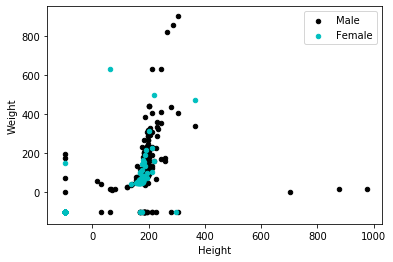

In [28]:
ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)

In [29]:
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()

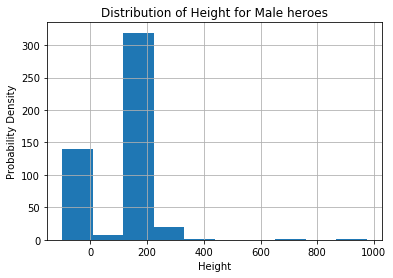

Mean height for male heroes: 109.11201629327903
Median height for male heroes: 180.0


In [31]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print('Mean height for male heroes: {}'.format(male_heroes_df.Height.mean()))
print('Median height for male heroes: {}'.format(male_heroes_df.Height.median()))

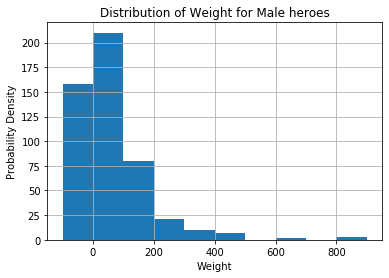

Mean weight for male heroes: 53.519053342681936
Median weight for male heroes: 79.0


In [32]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Mean weight for male heroes: {}'.format(male_heroes_df.Weight.mean()))
print('Median weight for male heroes: {}'.format(male_heroes_df.Weight.median()))

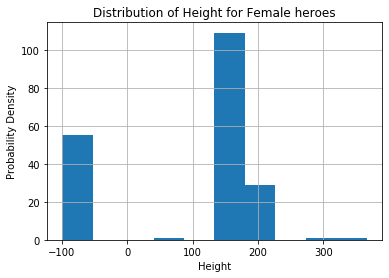

Mean height for female heroes: 97.99234693877551
Median height for female heroes: 168.0


In [33]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print('Mean height for female heroes: {}'.format(female_heroes_df.Height.mean()))
print('Median height for female heroes: {}'.format(female_heroes_df.Height.median()))

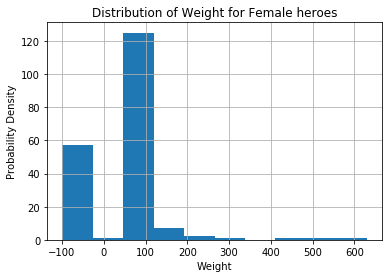

Mean weight for female heroes: 27.433673469387756
Median weight for female heroes: 54.0


In [34]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print('Mean weight for female heroes: {}'.format(female_heroes_df.Weight.mean()))
print('Median weight for female heroes: {}'.format(female_heroes_df.Weight.median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

Mean to Medain ratios and visual inspection show irrelevant data values that should be explored - current values are not a true reflection


In [35]:
print('Top Negative Heights:')
print(heroes_df[heroes_df.Height <= 0].Height.value_counts())

print('Top Negative Weights:')
print(heroes_df[heroes_df.Weight <= 0].Weight.value_counts())


Top Negative Heights:
-99.0    209
Name: Height, dtype: int64
Top Negative Weights:
-99.0    229
Name: Weight, dtype: int64


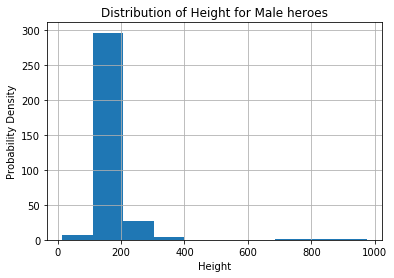

Mean Height for Male heroes: 192.62314540059347
Median Height for Male heroes: 185.0


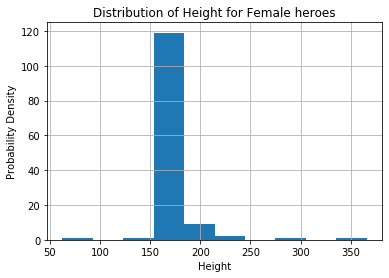

Mean Height for Female heroes: 174.90671641791045
Median Height for Female heroes: 170.0


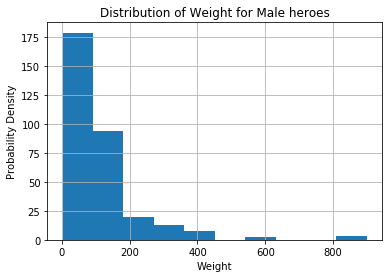

Mean Weight for Male heroes: 126.84594103842267
Median Weight for Male heroes: 90.0


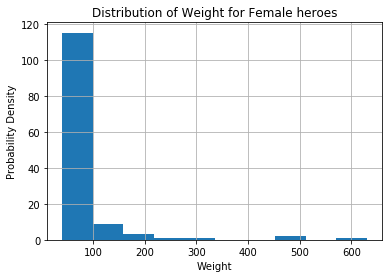

Mean Weight for Female heroes: 80.34848484848484
Median Weight for Female heroes: 57.5


In [36]:
for feat in ['Height', 'Weight']:
    df = heroes_and_powers_df[heroes_and_powers_df[feat]>0] #Temporarily remove negatives
    for group in ['Male', 'Female']:
        show_distplot(df[df['Gender']==group], group, feat)
        print('Mean {} for {} heroes: {}'.format(feat, group, df[df['Gender']==group][feat].mean()))
        print('Median {} for {} heroes: {}'.format(feat, group, df[df['Gender']==group][feat].median()))

In [40]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(heroes_and_powers_df)
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
print(overall_top_5)

KeyError: "['name'] not found in axis"

In [41]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='age_categories', data=heroes_and_powers_df)
plt.title("Powers")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

ValueError: Could not interpret input 'target'

<Figure size 576x360 with 0 Axes>

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data